# FETA-Net-Choice

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from csrank import *
from keras.optimizers import SGD

Using TensorFlow backend.


## The medoid problem

In [2]:
from csrank import ChoiceDatasetGenerator

In the medoid problem the goal of the discrete choice algorithms for the medoid problem is to find the most central object for the given set.
This problem is inspired by solving the task of finding a good representation of the given data using the most central point of the data points

We will generate a random dataset where each instance contains 30 objects and 2 features for easy plotting.

In [3]:
seed = 123
n_train = 10000
n_test = 10000
n_features = 2
n_objects = 30
gen = ChoiceDatasetGenerator(dataset_type='pareto', random_state=seed,
                                n_train_instances=n_train,
                                n_test_instances=n_test,
                                n_objects=n_objects,
                                n_features=n_features)

In [6]:
X_train, Y_train, X_test, Y_test = gen.get_single_train_test_split()

Let us plot a random instance. The pareto points are marked as P.

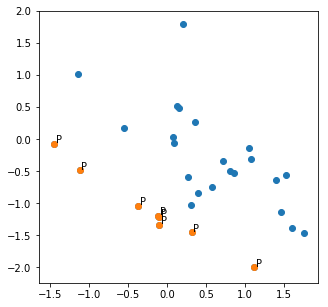

In [7]:
def get_name(d):
    if d ==0:
        return ""
    else:
        return "P"
fig, ax = plt.subplots(figsize=(5,5))
inst = np.random.choice(n_train)
choices = np.where(Y_train[inst]==1)[0]
ax.scatter(X_train[inst][:, 0], X_train[inst][:, 1])
ax.scatter(X_train[inst][choices, 0], X_train[inst][choices, 1])
for i in range(n_objects):
    ax.text(X_train[inst, i, 0]+0.02,
            X_train[inst, i, 1]+0.02,
            s=get_name(int(Y_train[inst, i])))

## The FATE network
The first-aggregate-then-evaluate approach learns an embedding of each object and then aggregates that into a _context_:
\begin{equation}
	\mu_{C(\vec{x})} = \frac{1}{|C(\vec{x})|} \sum_{\vec{y} \in C(\vec{x})} \phi(\vec{y})
\end{equation}
and then scores each object $\vec{x}$ using a generalized utility function $U (\vec{x}, \mu_{C(\vec{x})})$

In [8]:
fate = FATEChoiceFunction(
    n_object_features=n_features,
    optimizer=SGD(lr=1e-4, nesterov=True, momentum=0.9))

We will run the training for only 10 epochs to get an idea of the convergence:

In [ ]:
fate.fit(X_train, Y_train, verbose=True, epochs=10)

Train on 8100 samples, validate on 900 samples
Epoch 1/10


In [ ]:
scores = fate.predict_scores(X_test)
y_pred = fate.predict_for_scores(scores)

In [ ]:
from csrank.metrics_np import f1_measure
f1_measure(Y_test, y_pred)

Not converged yet, but let us visualize the scores it assigns to test instances:

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
inst = np.random.choice(n_test)
choices = np.where(Y_test[inst]==1)[0]
ax.scatter(X_test[inst][:, 0], X_test[inst][:, 1])
ax.scatter(X_test[inst][choices, 0], X_test[inst][choices, 1])
for i in range(n_objects):
    if Y_test[inst, i]:
        color = 'r'
    else:
        color = 'b'
    ax.text(X_test[inst, i, 0]-0.2,
            X_test[inst, i, 1]-0.2,
            s='{:.1f}'.format(scores[inst][i]),
            color=color)